In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from PIL import Image
import site
import numpy as np
import os
import sys
import tarfile
from IPython.display import display
from IPython.display import Image as image2
#from PIL import Image
from scipy import ndimage
from os.path import isfile, join
import h5py
import pandas
from scipy import stats, integrate
import seaborn as sns
import cv2
from six.moves import cPickle as pickle
import tensorflow as tf
%matplotlib inline

checking image existence: ['134.jpg', '261.jpg', '1.jpg', '10.jpg', '100.jpg']


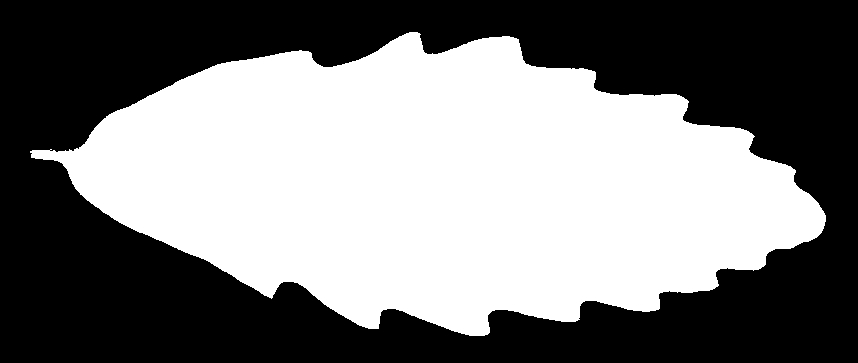

In [2]:
print("checking image existence: %s" % os.listdir('images')[:5])
display(image2(filename="images/10.jpg"))

In [3]:
train_data = pandas.read_csv('train.csv')
test_data = pandas.read_csv('test.csv')
print("we have %s train samples" % np.shape(train_data)[0])
print("and %s test samples" % np.shape(test_data)[0])

we have 990 train samples
and 594 test samples


In [4]:
print(train_data["species"][:5])
print(train_data["id"][:5])

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object
0    1
1    2
2    3
3    5
4    6
Name: id, dtype: int64


We have 99 labels


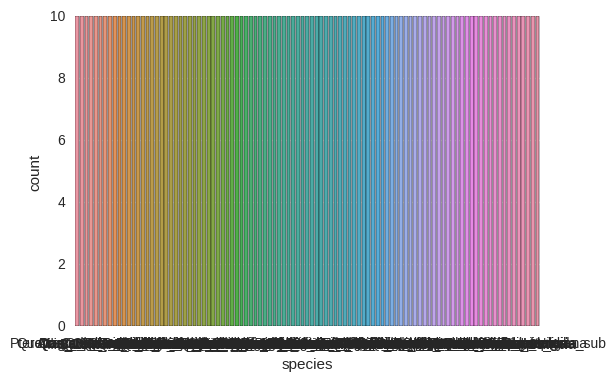

In [5]:
x = train_data["species"]
print("We have %s labels" % train_data["species"].nunique())
import seaborn as sns
sns.countplot(x)


In [6]:
image_names = [f for f in os.listdir('images') if isfile(join('images', f))] 
dim_images = []
print("launch dimension collector")
def get_dimensions(archives):
    for i in archives:
        try:
            with Image.open("images/"+i) as im:
                width, height = im.size
                dim_images.append((width,height))
        except:
            print("exception")

get_dimensions(image_names)

launch dimension collector


In [7]:
len(dim_images)

1584

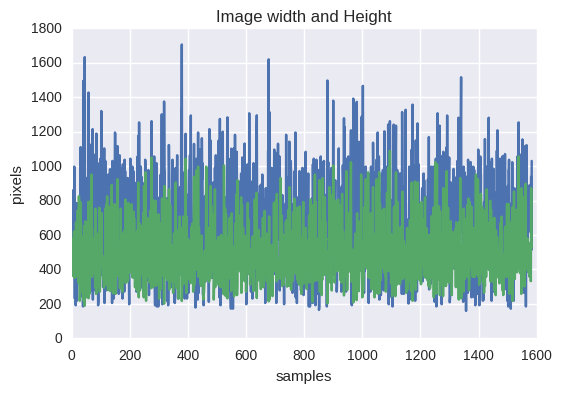

In [8]:
plt.xlabel('samples')
plt.ylabel('pixels')
plt.title('Image width and Height')
plt.plot(dim_images)

In [9]:
print("launch image resize collector")
def resize_images(archives):
    target_dim = (32,32)
    for i in archives:
        try:
            im = cv2.imread("images/"+i)
            resized = cv2.resize(im, target_dim, interpolation = cv2.INTER_AREA)
            cv2.imwrite("imresized/"+i,resized)
        except:
            print("exception")


resize_images(image_names)

launch image resize collector


launch dimension collector


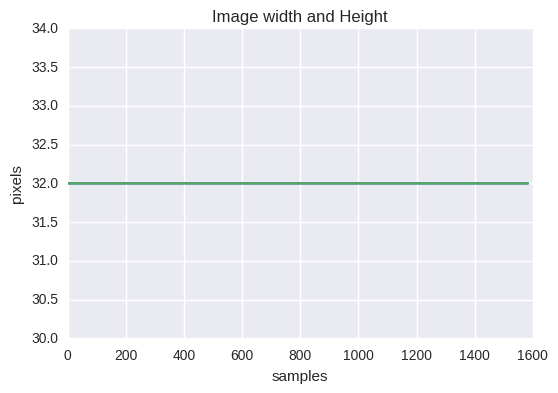

In [10]:
image_names = [f for f in os.listdir('imresized') if isfile(join('imresized', f))] 
dim_images = []
print("launch dimension collector")
def get_dimensions(archives):
    for i in archives:
        try:
            with Image.open("imresized/"+i) as im:
                width, height = im.size
                dim_images.append((width,height))
        except:
            print("exception")

get_dimensions(image_names)
plt.xlabel('samples')
plt.ylabel('pixels')
plt.title('Image width and Height')
plt.plot(dim_images)

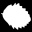

In [11]:
display(image2(filename="imresized/10.jpg"))

In [12]:
labels = train_data["species"]
picno = train_data["id"]

In [15]:
image_names = [f for f in os.listdir('imresized') if isfile(join('imresized', f))] 

def create_dataset(data):
    num = 0
    length = len(data["id"])
    dataset =  np.ndarray(shape=(length, 32, 32),dtype=np.float32)
    try:
        for i in image_names:
            image = Image.open("imresized/"+i)
            labels[i,:] = data["species"][i]
            dataset[i,:,:] = image
    except:
        print("nothing for %s" % i)
    

    return dataset, labels

In [16]:
train_dataset, train_labels = create_dataset(train_data)

nothing for 1342.jpg


In [4]:
pickle_file = 'leafs.pickle'

dataset={
    'train_dataset': train_dataset,
     'train_labels': train_labels,
   # 'test_dataset': test_dataset,
}

with open(pickle_file, 'wb') as picklefile:
    pickle.dump(dataset, picklefile, pickle.HIGHEST_PROTOCOL)
picklefile.close()

In [ ]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

In [2]:
pickle_file = 'leafs.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  del save 



<H1>Transforming text labels to numerical values</H1>

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [4]:
le = preprocessing.LabelEncoder()
le.fit(train_labels)
LabelEncoder()
list(le.classes_)
transf_labels = le.transform(train_labels) 

In [5]:
print(train_dataset.shape)
print(train_labels.shape)
print(train_labels[258])
print(transf_labels[0])
print(len(transf_labels))

(990, 32, 32)
(990,)
Liriodendron_Tulipifera
3
990


In [9]:
def kick_zeros():
    newarray = []
    for i in transf_labels:
        if transf_labels[i] + 1 == 99:
            newarray.append(transf_labels[i] +1)
        else:
            newarray.append(transf_labels[i] +1)
        
    return newarray

transf_labels = kick_zeros()
        
#print(transf_labels)

In [10]:
#####not in use###
def onehot_labels():
    newarray = []
    for i in range(len(transf_labels)):
        labelrack = []
        labelrack = np.zeros(100)
        hotno = transf_labels[i]
        labelrack[hotno] = 1.0
        newarray.append(labelrack)

    return newarray
        
newarray = onehot_labels()


In [11]:

print(newarray[0])

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [42]:
image_size = 32
num_channels = 1
####for my non convoluted network attempt the formatting will go ahead with two keys for x and y parameters each

def reshape(dataset, labels):
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    #setting this as float will cause problems
    #labels = transf_labels.astype(np.int32)
    labels = np.array(newarray).astype(np.float32)
    return dataset, labels

train_dataset, train_labels = reshape(train_dataset, train_labels)
print('Training set', train_dataset.shape, train_labels.shape)


Training set (990, 32, 32, 1) (990, 100)


In [43]:
train_labels[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [ ]:
import sklearn


def accuracy(predictions, labels):
    print("predictions %s" % np.argmax(predictions, 1))
    print("labels %s" % np.argmax(labels, 1))
    return (sklearn.metrics.accuracy_score(np.argmax(predictions, 1),np.argmax(labels, 1)))


In [56]:
batch_size = 128
patch = 5
c1_out = 32
c2_out = 64
fc_out = 1024
####changed from 10 to 11
num_labels = 100
channels = 1
regul = 1000.0

graph = tf.Graph()
with graph.as_default():
    
  regulate = tf.contrib.layers.l2_regularizer(regul)

  #loading training and verification data
  tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size, image_size, channels))
    ####adapted 2nd dimension from 5 to 6 to account for additional label (length of number)###
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size,100))
    

  
  #definining helper functions
  def weight_var(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

  def bias_var(shape):
        initial = tf.constant(0.1, shape=shape)
        return tf.Variable(initial)

  def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

  def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

  #defining weights and biases for each layer
  W_conv1 = weight_var([patch, patch, 1, c1_out])
  b_conv1 = bias_var([c1_out])

  W_conv2 = weight_var([patch, patch, c1_out, c2_out])
  b_conv2 = bias_var([c2_out])
  #####image size adapted to 8x8
  W_fc1 = weight_var([8 * 8 * c2_out, fc_out])
  b_fc1 = bias_var([fc_out])
    
  ###each logit gets its own weight and bias
  s1_w = weight_var([fc_out, num_labels])
  s1_b = bias_var([num_labels])   

  
  #handler forward propagation through network
  def model(data):
    h_conv1 = tf.nn.relu(conv2d(data, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    #####image size adapted to 8x8
    h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*c2_out])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    logits1 = tf.matmul(h_fc1, s1_w) + s1_b
    
    
    
    tf.contrib.layers.apply_regularization(regulate, weights_list=[
    W_conv1, 
    W_conv2,
    W_fc1,
     s1_w])


    return logits1

  # Training computation.
  #for a single digit: logits = tf.matmul(tf_train_dataset, weights) + biases
  logits1 = model(tf_train_dataset)
     
  #tf.Print(loss, [loss], "cost")
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(tf.log(tf.clip_by_value(logits1[:,:],1e-10,1)) , tf_train_labels))
  #loss = tf.reduce_mean(tf.reduce_sum(tf_train_labels *tf.clip_by_value(logits1,1e-10,1)))
  #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits1[:,:] , tf_train_labels[:,:]))

  
  
  #loss reduction with adagrad
  optimizer = tf.train.AdagradOptimizer(0.05).minimize(loss)
  #optimizer = tf.train.AdamOptimizer(0.015).minimize(loss)

  # Predictions for the training, validation, and test data.
  #train_prediction = tf.nn.softmax(logits1[:,:])
  train_prediction = tf.nn.softmax(logits1) 
    
  saver = tf.train.Saver()





In [ ]:
num_steps = 10001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("Initialized")
  for step in range(num_steps):
    # Picking a random slice of the training data
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # and plugging it into a minibatch preparation
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size),:]
    # setting a dictionary up with the minibatch
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 100 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      #print(predictions)

Initialized
Minibatch loss at step 0: 15.629995
predictions [ 0 79 82  9 77 82 82 82 82  9 82 82 82 82 82 87 55 95  9  9  6 90  9 64 72
  9 11 82  9 81 31 90  9  9 88 58 62 88  9  9 79 98  9 10 69  5  9 82 64  9
 21 29 31  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9 52  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9]
labels [ 3 49 65 94 84 40 54 78 53 89 98 16 74 50 58 31 43  4 75 44 83 84 13 66 15
  6 73 22 73 31 36 27 94 88 12 28 21 25 20 60 84 65 69 58 23 76 18 52 54  9
 48 47 64 81 83 36 58 21 81 20 62 88 34 92 79 82 20 32  4 84 36 35 72 60 71
 72 52 50 54 11 51 18 47  5  8 37 97 20 33  1 59  1 56  1  9 57 20 79 29 16
 32 54 93 10 46 59 84 76 15 10 15  0 69  4 51 51 94 36 39 62  2 24 26 35 25
 87  0 55]
Minibatch accuracy: 0.0%
Minibatch loss at step 100: 17.924835
predictions [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
